<a href="https://colab.research.google.com/github/senabaskan/datascience/blob/master/Bank_Deposit_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt



In [0]:
bank_full = pd.read_csv('bank-full.csv', sep = ";")
bank = pd.read_csv('bank.csv', sep = ";")

In [0]:
bank_full_x = pd.read_csv('bank-full.csv', sep = ";")


In [121]:
bank_full.shape

(45211, 17)

In [6]:
bank.shape

(4521, 17)

In [0]:
bank_full.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Irrelevant Columns**



"Day" and "Month" due to the existence of the attribute "pdays"

In [0]:
bank_full.drop(columns = ['day', 'month'], axis=1, inplace = True)
bank_full.drop_duplicates(inplace=True)

In [123]:
bank_full.shape

(45210, 15)

In [10]:
bank_full._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45210 non-null  int64
 1   balance   45210 non-null  int64
 2   duration  45210 non-null  int64
 3   campaign  45210 non-null  int64
 4   pdays     45210 non-null  int64
 5   previous  45210 non-null  int64
dtypes: int64(6)
memory usage: 2.4 MB


In [0]:
bank_full.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
duration        4918
campaign          63
pdays            871
previous         275
poutcome     unknown
y                yes
dtype: object

In [0]:
bank_full.min()

age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
duration            0
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object

In [124]:
bank_full.isnull().sum().sum()

0

Features to be encoded:

One hot encoding -> Job, Marital, Contact

Ordinal encoding -> Education, poutcome

Label encoding -> Default, housing, loan










In [0]:
onehotencoder = OneHotEncoder() 


In [0]:
onehot_job = pd.DataFrame(onehotencoder.fit_transform(bank_full[['job']]).toarray())
onehot_marital = pd.DataFrame(onehotencoder.fit_transform(bank_full[['marital']]).toarray())
onehot_contact = pd.DataFrame(onehotencoder.fit_transform(bank_full[['contact']]).toarray())



In [127]:
onehot_contact

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
45205,1.0,0.0,0.0
45206,1.0,0.0,0.0
45207,1.0,0.0,0.0
45208,0.0,1.0,0.0


In [128]:
bank_full.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [0]:
temp = {'unknown':0, 'primary' :1, 'secondary':2, 'tertiary' : 3}
bank_full['education_ord'] = bank_full.education.map(temp)

In [130]:
bank_full.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [0]:
temp2 = {'unknown':0, 'other' :0, 'failure':-1, 'success' : 1}
bank_full['poutcome_ord'] = bank_full.poutcome.map(temp2)

In [0]:
bank_full.drop(columns = ['education', 'poutcome'], axis=1, inplace=True)

In [133]:
bank_full.shape

(45210, 15)

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
bank_full['default_encoded'] = LabelEncoder().fit_transform(bank_full.default)
bank_full.reset_index(drop = True, inplace = True)

In [136]:
bank_full.shape

(45210, 16)

In [137]:
bank_full.tail()

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,education_ord,poutcome_ord,default_encoded
45205,51,technician,married,no,825,no,no,cellular,977,3,-1,0,yes,3,0,0
45206,71,retired,divorced,no,1729,no,no,cellular,456,2,-1,0,yes,1,0,0
45207,72,retired,married,no,5715,no,no,cellular,1127,5,184,3,yes,2,1,0
45208,57,blue-collar,married,no,668,no,no,telephone,508,4,-1,0,no,2,0,0
45209,37,entrepreneur,married,no,2971,no,no,cellular,361,2,188,11,no,2,0,0


In [0]:
bank_full['housing_encoded'] = LabelEncoder().fit_transform(bank_full.housing)
bank_full['loan_encoded'] = LabelEncoder().fit_transform(bank_full.loan)

In [139]:
bank_full.tail()

,age,job,marital,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,education_ord,poutcome_ord,default_encoded,housing_encoded,loan_encoded
45205,51,technician,married,no,825,no,no,cellular,977,3,-1,0,yes,3,0,0,0,0
45206,71,retired,divorced,no,1729,no,no,cellular,456,2,-1,0,yes,1,0,0,0,0
45207,72,retired,married,no,5715,no,no,cellular,1127,5,184,3,yes,2,1,0,0,0
45208,57,blue-collar,married,no,668,no,no,telephone,508,4,-1,0,no,2,0,0,0,0
45209,37,entrepreneur,married,no,2971,no,no,cellular,361,2,188,11,no,2,0,0,0,0


In [0]:
bank_full.drop(columns = ['default', 'housing', 'loan'], axis = 1, inplace = True)
bank_full.drop(columns = ['job', 'marital', 'contact'], axis = 1, inplace = True)

In [141]:
bank_full.shape

(45210, 12)

In [0]:
onehot_job.columns = ['job1','job2','job3','job4','job5','job6','job7','job8','job9','job10','job11','job12']
onehot_marital.columns = ['marital1','marital2','marital3']
onehot_contact.columns = ['contact1','contact2','contact3']
bank_full_encoded = pd.concat([bank_full, onehot_job, onehot_marital, onehot_contact], axis = 1)

In [143]:
onehot_contact.shape

(45210, 3)

In [144]:
bank_full_encoded.tail()

,age,balance,duration,campaign,pdays,previous,y,education_ord,poutcome_ord,default_encoded,housing_encoded,loan_encoded,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,job11,job12,marital1,marital2,marital3,contact1,contact2,contact3
45205,51,825,977,3,-1,0,yes,3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
45206,71,1729,456,2,-1,0,yes,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45207,72,5715,1127,5,184,3,yes,2,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
45208,57,668,508,4,-1,0,no,2,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45209,37,2971,361,2,188,11,no,2,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [145]:
bank_full.shape

(45210, 12)

In [146]:
bank_full_encoded.shape

(45210, 30)

In [147]:
bank_full_encoded.y.value_counts() # imbalanced data

no     39921
yes     5289
Name: y, dtype: int64

Let's firstly go on without filtering features. 

In [0]:
from imblearn.over_sampling import SMOTE 

In [0]:
sm = SMOTE(random_state=42)

In [0]:
X = bank_full_encoded.drop(columns=['y'], axis=1)

In [151]:
X.shape

(45210, 29)

In [0]:
y = bank_full_encoded.y

In [48]:
y.shape

(45210,)

In [153]:
bank_full_encoded.head()

,age,balance,duration,campaign,pdays,previous,y,education_ord,poutcome_ord,default_encoded,housing_encoded,loan_encoded,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,job11,job12,marital1,marital2,marital3,contact1,contact2,contact3
0,58,2143,261,1,-1,0,no,3,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,29,151,1,-1,0,no,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,2,76,1,-1,0,no,2,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,1506,92,1,-1,0,no,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,1,198,1,-1,0,no,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [154]:
X_res, y_res = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [155]:
X_res.shape

(79842, 29)

In [156]:
y_res.shape

(79842,)

In [0]:
X_res_df = pd.DataFrame(X_res)
y_res_df = pd.DataFrame(y_res)

In [0]:
y_res_df.columns = ['y']

In [159]:
y_res_df.y.value_counts() # imbalanced data

yes    39921
no     39921
Name: y, dtype: int64

In [0]:
temp3 = {'yes':1, 'no' :0}
y_res_df['target'] = y_res_df.y.map(temp3)
y_res_df.drop(columns = ['y'], inplace = True)

Now we have balanced data.

In [161]:
bank_full_encoded.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'education_ord', 'poutcome_ord', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'job1', 'job2', 'job3', 'job4', 'job5', 'job6', 'job7',
       'job8', 'job9', 'job10', 'job11', 'job12', 'marital1', 'marital2',
       'marital3', 'contact1', 'contact2', 'contact3'],
      dtype='object')

In [0]:
X_res_df.columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'education_ord', 'poutcome_ord', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'job1', 'job2', 'job3', 'job4', 'job5', 'job6', 'job7',
       'job8', 'job9', 'job10', 'job11', 'job12', 'marital1', 'marital2',
       'marital3', 'contact1', 'contact2', 'contact3']

In [163]:
X_res_df.head()

,age,balance,duration,campaign,pdays,previous,education_ord,poutcome_ord,default_encoded,housing_encoded,loan_encoded,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,job11,job12,marital1,marital2,marital3,contact1,contact2,contact3
0,58.0,2143.0,261.0,1.0,-1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44.0,29.0,151.0,1.0,-1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33.0,2.0,76.0,1.0,-1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47.0,1506.0,92.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33.0,1.0,198.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [0]:
X_scaled = scaler.fit_transform(X_res_df)
X_scaled = pd.DataFrame(X_scaled, columns=X_res_df.columns)

In [166]:
X_scaled.head()

,age,balance,duration,campaign,pdays,previous,education_ord,poutcome_ord,default_encoded,housing_encoded,loan_encoded,job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,job11,job12,marital1,marital2,marital3,contact1,contact2,contact3
0,1.545355,0.188201,-0.335253,-0.582616,-0.488137,-0.358308,1.208740,0.028359,-0.128483,1.125462,-0.410066,-0.393701,-0.497960,-0.182791,-0.169074,2.00061,-0.294999,-0.205533,-0.320211,-0.20784,-0.478445,-0.202296,-0.087242,-0.389566,0.944475,-0.739131,-1.713971,-0.288962,2.032007
1,0.266218,-0.480441,-0.652757,-0.582616,-0.488137,-0.358308,-0.155273,0.028359,-0.128483,1.125462,-0.410066,-0.393701,-0.497960,-0.182791,-0.169074,-0.58954,-0.294999,-0.205533,-0.320211,-0.20784,2.433206,-0.202296,-0.087242,-0.389566,-1.230817,1.579465,-1.713971,-0.288962,2.032007
2,-0.738818,-0.488981,-0.869236,-0.582616,-0.488137,-0.358308,-0.155273,0.028359,-0.128483,1.125462,2.715266,-0.393701,-0.497960,6.194427,-0.169074,-0.58954,-0.294999,-0.205533,-0.320211,-0.20784,-0.478445,-0.202296,-0.087242,-0.389566,0.944475,-0.739131,-1.713971,-0.288962,2.032007
3,0.540319,-0.013277,-0.823054,-0.582616,-0.488137,-0.358308,-2.883297,0.028359,-0.128483,1.125462,-0.410066,-0.393701,2.260262,-0.182791,-0.169074,-0.58954,-0.294999,-0.205533,-0.320211,-0.20784,-0.478445,-0.202296,-0.087242,-0.389566,0.944475,-0.739131,-1.713971,-0.288962,2.032007
4,-0.738818,-0.489297,-0.517096,-0.582616,-0.488137,-0.358308,-2.883297,0.028359,-0.128483,-1.009508,-0.410066,-0.393701,-0.497960,-0.182791,-0.169074,-0.58954,-0.294999,-0.205533,-0.320211,-0.20784,-0.478445,-0.202296,13.478522,-0.389566,-1.230817,1.579465,-1.713971,-0.288962,2.032007


In [167]:
LogReg = LogisticRegression()
LogReg.fit(X_scaled, y_res_df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's transform test data.

In [0]:
bank.drop(columns = ['day', 'month'], axis=1, inplace = True)
bank.drop_duplicates(inplace=True)

In [169]:
bank.isnull().sum().sum()

0

In [0]:
onehot_job_test = pd.DataFrame(onehotencoder.fit_transform(bank[['job']]).toarray())
onehot_marital_test = pd.DataFrame(onehotencoder.fit_transform(bank[['marital']]).toarray())
onehot_contact_test = pd.DataFrame(onehotencoder.fit_transform(bank[['contact']]).toarray())

In [0]:
bank['education_ord'] = bank.education.map(temp)
bank['poutcome_ord'] = bank.poutcome.map(temp2)

In [0]:
bank.drop(columns = ['education', 'poutcome'], axis=1, inplace=True)

In [0]:
bank['default_encoded'] = LabelEncoder().fit_transform(bank.default)
bank.reset_index(drop = True, inplace = True)

In [0]:
bank['housing_encoded'] = LabelEncoder().fit_transform(bank.housing)
bank['loan_encoded'] = LabelEncoder().fit_transform(bank.loan)

In [0]:
bank.drop(columns = ['default', 'housing', 'loan'], axis = 1, inplace = True)
bank.drop(columns = ['job', 'marital', 'contact'], axis = 1, inplace = True)

In [0]:
onehot_job_test.columns = ['job1','job2','job3','job4','job5','job6','job7','job8','job9','job10','job11','job12']
onehot_marital_test.columns = ['marital1','marital2','marital3']
onehot_contact_test.columns = ['contact1','contact2','contact3']
bank_encoded = pd.concat([bank, onehot_job_test, onehot_marital_test, onehot_contact_test], axis = 1)

In [177]:
bank_encoded.shape

(4521, 30)

In [0]:
X_test = bank_encoded.drop(columns=['y'], axis=1)

In [0]:
y_test = bank_encoded.y

In [0]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

In [0]:
y_test_df.columns = ['y']

In [0]:
y_test_df['target'] = y_test_df.y.map(temp3)
y_test_df.drop(columns = ['y'], inplace = True)

In [0]:
X_test_df.columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'education_ord', 'poutcome_ord', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'job1', 'job2', 'job3', 'job4', 'job5', 'job6', 'job7',
       'job8', 'job9', 'job10', 'job11', 'job12', 'marital1', 'marital2',
       'marital3', 'contact1', 'contact2', 'contact3']

In [0]:
X_test_scaled = scaler.fit_transform(X_test_df)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_df.columns)

In [0]:
y_predict = LogReg.predict(X_test_scaled)

In [186]:
y_predict

array([0, 0, 1, ..., 0, 1, 1])

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
confusion_matrix(y_test_df, y_predict)

array([[2492, 1508],
       [  41,  480]])

In [188]:
roc_auc_score(y_test_df, y_predict)

0.7721525911708254

In [189]:
precision_score(y_test_df, y_predict)

0.2414486921529175

In [190]:
f1_score(y_test_df, y_predict)

0.3826225587883619

In [192]:
recall_score(y_test_df, y_predict)

0.9213051823416507

In [0]:
y_train_and_test = pd.concat([y_res_df, y_test_df],axis=0)

In [0]:
y_train_and_test

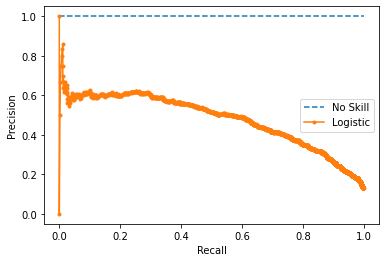

In [196]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

yhat = LogReg.predict_proba(X_test_scaled)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_train_and_test[y_train_and_test==1]) / len(y_train_and_test)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_df, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
auc_score = metrics.auc(recall, precision)

In [199]:
auc_score # PR Auc score for non-filtered (features) dataset

0.4805893597780857

Let's examine correlations between features.

In [0]:
corre = X.corr(method ='pearson').abs()

In [0]:
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[28:40])

age            age              1.000000
contact1       contact3         0.862396
contact3       contact1         0.862396
marital3       marital2         0.772355
marital2       marital3         0.772355
poutcome_ord   pdays            0.479258
pdays          poutcome_ord     0.479258
previous       pdays            0.454819
pdays          previous         0.454819
job5           education_ord    0.450458
education_ord  job5             0.450458
job6           age              0.447392
dtype: float64


In [220]:
corre = X.corr(method ='spearman').abs()
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[28:40])

age            age              1.000000
previous       pdays            0.985644
pdays          previous         0.985644
contact1       contact3         0.862396
contact3       contact1         0.862396
marital2       marital3         0.772355
marital3       marital2         0.772355
education_ord  job5             0.508374
job5           education_ord    0.508374
pdays          poutcome_ord     0.476175
poutcome_ord   pdays            0.476175
age            marital3         0.459132
dtype: float64


In [221]:
corre = X.corr(method ='kendall').abs()
s = corre.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[28:40])

age            age              1.000000
previous       pdays            0.902707
pdays          previous         0.902707
contact1       contact3         0.862396
contact3       contact1         0.862396
marital3       marital2         0.772355
marital2       marital3         0.772355
job5           education_ord    0.479852
education_ord  job5             0.479852
marital2       marital1         0.443645
marital1       marital2         0.443645
poutcome_ord   pdays            0.440491
dtype: float64
